# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [41]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

 # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
     



    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+") # YOUR CODE HERE
    
    
    # Log the url, record, and set numbers
    #OG
    #nOG
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json() # YOUR CODE HERE
#         print(city_weather)
#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity =  city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind =  city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE
       
      # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
       
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


####GOOD UNTIL HERE REMEMBER TO COPY THE CELLS 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | halalo
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | jizan
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | cherkasskoye
Processing Record 9 of Set 1 | baykit
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | muros
Processing Record 12 of Set 1 | johannesburg
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | awbari
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | nouadhibou
Processing Record 18 of Set 1 | taraz
Processing Record 19 of Set 1 | tilichiki
Processing Record 20 of Set 1 | labytnangi
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | phan rang
City not found

Processing Record 37 of Set 4 | zhigalovo
Processing Record 38 of Set 4 | pangkalanbuun
Processing Record 39 of Set 4 | severo-yeniseyskiy
Processing Record 40 of Set 4 | montgomery
Processing Record 41 of Set 4 | kaiyuan
Processing Record 42 of Set 4 | estrela
Processing Record 43 of Set 4 | skjervoy
Processing Record 44 of Set 4 | tabuk
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | san clemente
Processing Record 48 of Set 4 | ramhormoz
Processing Record 49 of Set 4 | hirara
Processing Record 50 of Set 4 | beringovskiy
Processing Record 1 of Set 5 | guilin
Processing Record 2 of Set 5 | ikongo
Processing Record 3 of Set 5 | espanola
Processing Record 4 of Set 5 | kununurra
Processing Record 5 of Set 5 | tucumcari
Processing Record 6 of Set 5 | lucapa
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | ballina
Processing Record 9 of Set 5 | son la
Processing Record 10 of Set 5 | adrar
Processing Record 

Processing Record 24 of Set 8 | shimoda
Processing Record 25 of Set 8 | zyryanovsk
Processing Record 26 of Set 8 | puerto quijarro
Processing Record 27 of Set 8 | mogadishu
Processing Record 28 of Set 8 | sulangan
Processing Record 29 of Set 8 | hobyo
Processing Record 30 of Set 8 | fernie
Processing Record 31 of Set 8 | tibagi
Processing Record 32 of Set 8 | teguise
Processing Record 33 of Set 8 | luderitz
Processing Record 34 of Set 8 | vila franca do campo
Processing Record 35 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 36 of Set 8 | olga
Processing Record 37 of Set 8 | labuan
Processing Record 38 of Set 8 | marigot
Processing Record 39 of Set 8 | ginda
Processing Record 40 of Set 8 | okha
Processing Record 41 of Set 8 | upington
Processing Record 42 of Set 8 | northam
Processing Record 43 of Set 8 | williston
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | dezhou
Processing Record 46 of Set 8 | uyuni
Processing Record 47 of Set 8 | kulhudh

Processing Record 13 of Set 12 | kuche
City not found. Skipping...
Processing Record 14 of Set 12 | maarianhamina
Processing Record 15 of Set 12 | camargo
Processing Record 16 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 17 of Set 12 | zmeinogorsk
Processing Record 18 of Set 12 | skole
Processing Record 19 of Set 12 | puerto carreno
Processing Record 20 of Set 12 | khonsa
Processing Record 21 of Set 12 | yenagoa
Processing Record 22 of Set 12 | gamba
Processing Record 23 of Set 12 | aberdeen
Processing Record 24 of Set 12 | peniche
Processing Record 25 of Set 12 | santiago del estero
Processing Record 26 of Set 12 | antalaha
Processing Record 27 of Set 12 | la orilla
Processing Record 28 of Set 12 | sarab
Processing Record 29 of Set 12 | ravar
Processing Record 30 of Set 12 | port moresby
Processing Record 31 of Set 12 | auki
Processing Record 32 of Set 12 | mandalgovi
Processing Record 33 of Set 12 | batagay-alyta
Processing Record 34 of Set 12 | isiro
Processi

In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [43]:
# keep Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,15.92,56,0,4.15,US,1674456700
1,jamestown,42.0970,-79.2353,0.01,72,100,2.06,US,1674456700
2,saint-philippe,-21.3585,55.7679,25.77,75,100,2.86,RE,1674456701
3,butaritari,3.0707,172.7902,27.30,76,100,5.31,KI,1674456701
4,jizan,17.3333,42.6667,25.52,66,19,2.09,SA,1674456702


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
###GOOD TiLL HERE

In [45]:
#OG Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,15.92,56,0,4.15,US,1674456700
1,jamestown,42.0970,-79.2353,0.01,72,100,2.06,US,1674456700
2,saint-philippe,-21.3585,55.7679,25.77,75,100,2.86,RE,1674456701
3,butaritari,3.0707,172.7902,27.30,76,100,5.31,KI,1674456701
4,jizan,17.3333,42.6667,25.52,66,19,2.09,SA,1674456702


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

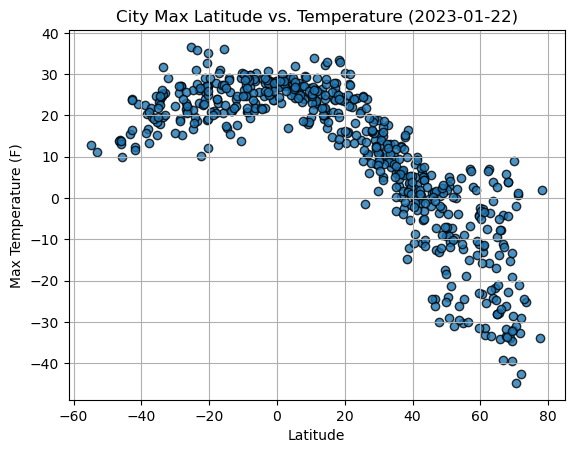

In [53]:
# KEEEPPP Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Max Latitude vs. Temperature ("+ time.strftime("%Y-%m-%d") +")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

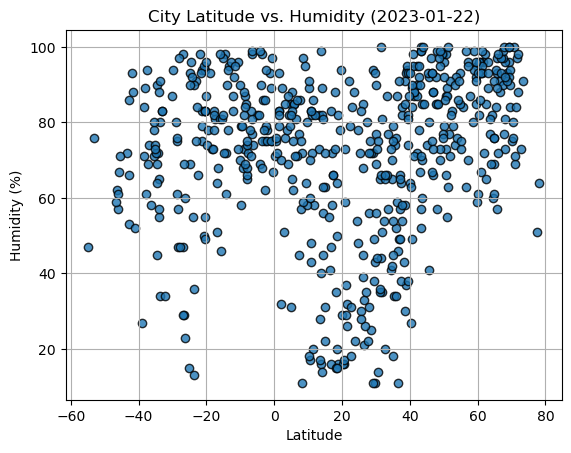

In [55]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ("+ time.strftime("%Y-%m-%d")+")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

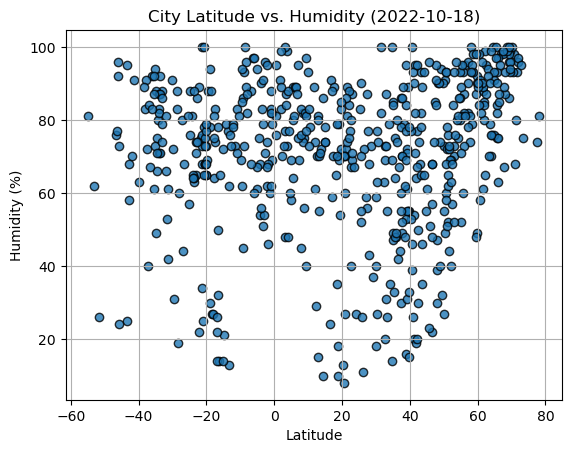

In [9]:
#OG Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

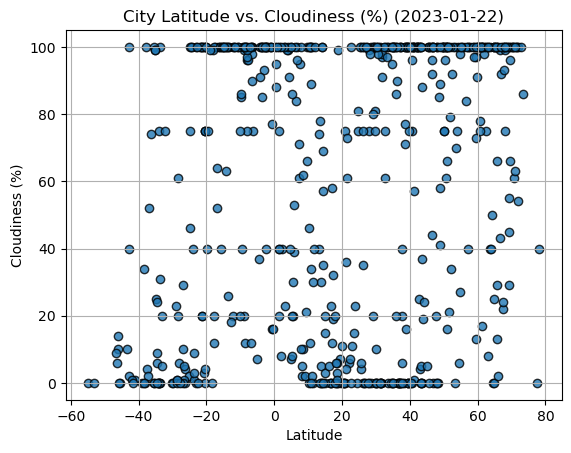

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("(%Y-%m-%d)"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

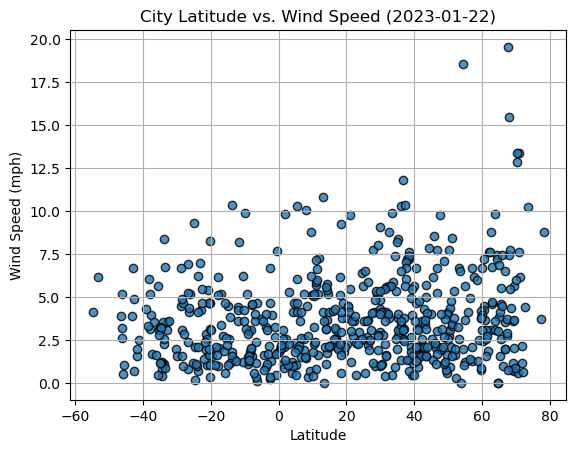

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("(%Y-%m-%d)"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label,y_label, text_coordinates):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value**2:.6f}")
    plt.show()
    

In [62]:
#WHY IS THE ORDER WRONG?? Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,15.92,56,0,4.15,US,1674456700
1,jamestown,42.0970,-79.2353,0.01,72,100,2.06,US,1674456700
3,butaritari,3.0707,172.7902,27.30,76,100,5.31,KI,1674456701
4,jizan,17.3333,42.6667,25.52,66,19,2.09,SA,1674456702
5,bethel,41.3712,-73.4140,3.05,87,100,2.06,US,1674456702


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saint-philippe,-21.3585,55.7679,25.77,75,100,2.86,RE,1674456701
10,johannesburg,-26.2023,28.0436,21.75,60,0,5.14,ZA,1674456671
11,ushuaia,-54.8000,-68.3000,12.81,47,0,4.12,AR,1674456704
22,kaitangata,-46.2817,169.8464,13.85,62,6,5.14,NZ,1674456707
23,arraial do cabo,-22.9661,-42.0278,23.09,91,100,4.21,BR,1674456707


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.756431


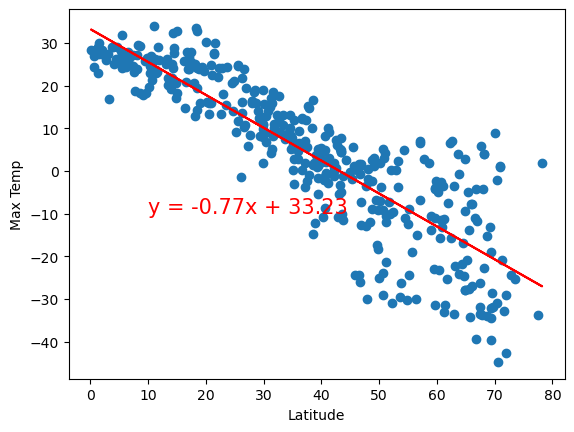

In [109]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,'','Latitude','Max Temp',(10,-10))
#(x_values, y_values, title, x_label,y_label, text_coordinates):

The r-value is: 0.251719


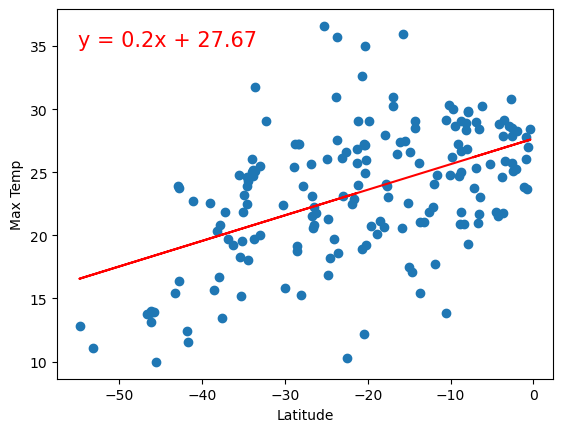

In [110]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'','Latitude','Max Temp',(-55,35))

**Discussion about the linear relationship:**
-It is clear that the atmospheric temperature rises as the measurement in latitude approaches the equator at latitude 0. The majority of cities in the sample of cities considered are located in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.151903


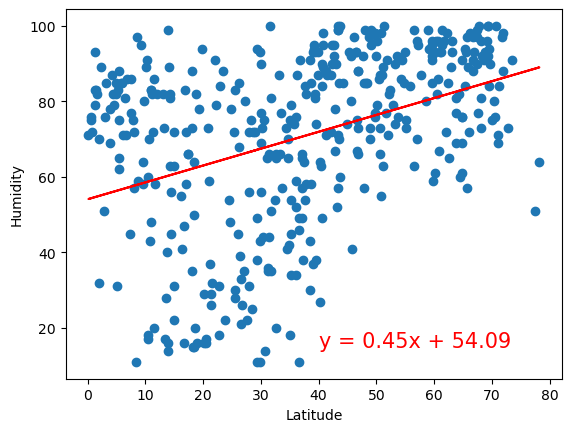

In [130]:
# Northern Hemisphere keep
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],'', 'Humidity (%)', 'Humidity', (40, 15))

The r-value is: 0.087774


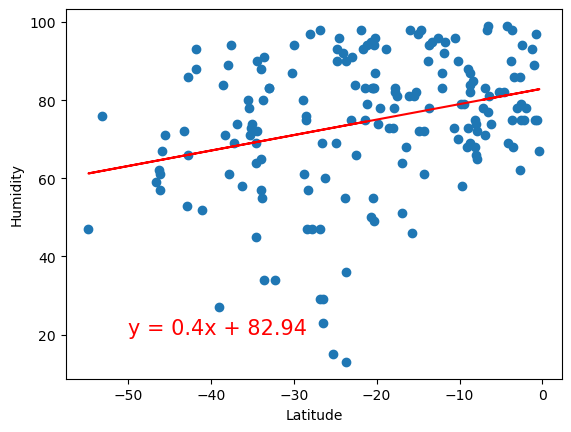

In [131]:
# Southern Hemisphere keep
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],'', 'Humidity (%)', 'Humidity', (-50, 20))

**Discussion about the linear relationship:**


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.069012


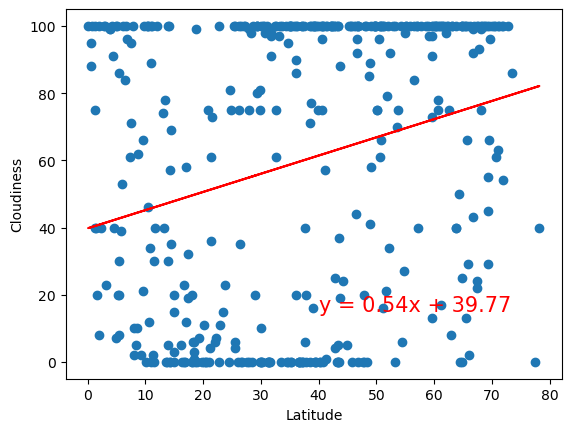

In [113]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],'', 'Cloudiness', 'Cloudiness', (40, 15))

The r-value is: 0.327465


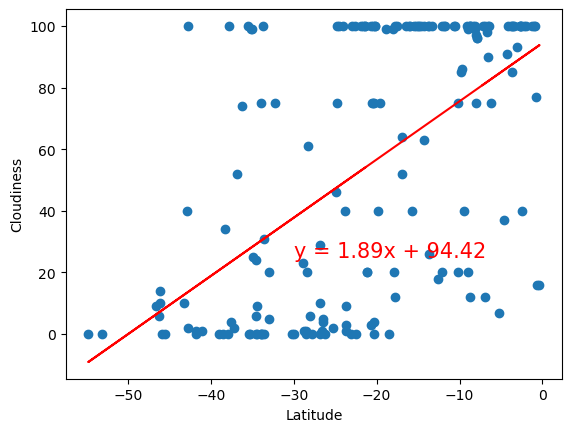

In [114]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],'', 'Cloudiness', 'Cloudiness', (-30, 25))

**Discussion about the linear relationship:** 
-The cloudiness graphs express how there is not a direct 
linear correlation between the cloudiness levels and 
the change in latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.020207


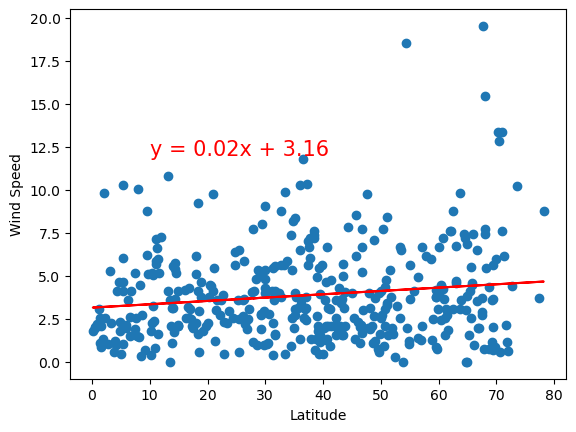

In [124]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df["Wind Speed"],'', 'Lat', "Wind Speed", (10, 12))

The r-value is: 0.007629


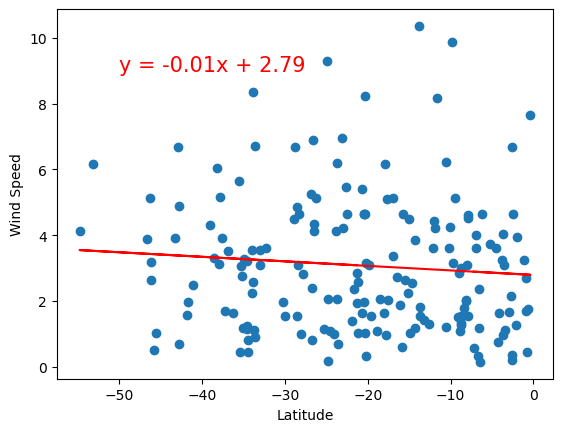

In [128]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df["Wind Speed"],'', 'Lat', "Wind Speed", (-50, 9))

**Discussion about the linear relationship:** 
-The wind speed graphs express how there is not a direct 
linear correlation between the wind speed and 
the change in latitude. 